In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import random

## Bifurcation Diagram of Logistic Map

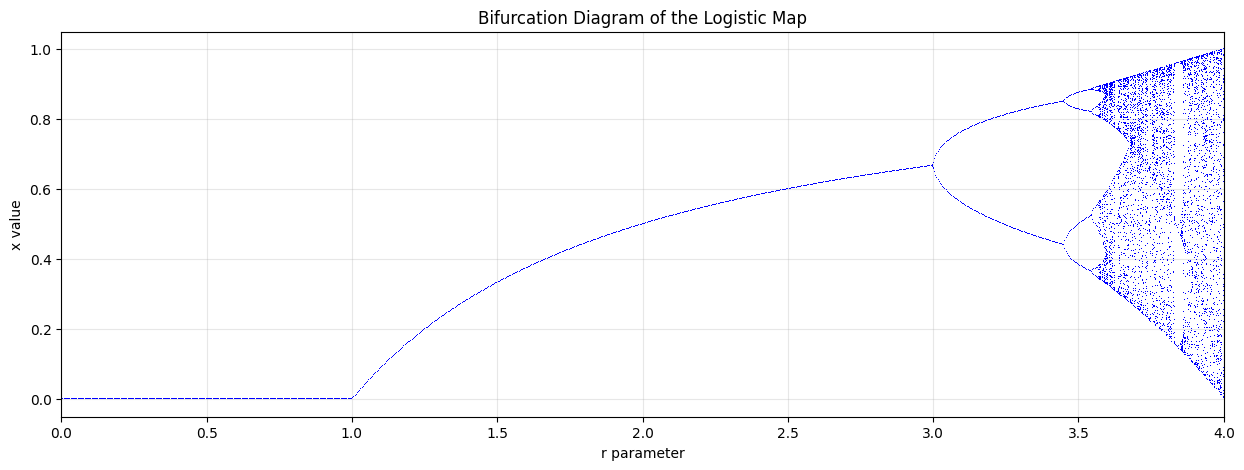

In [ ]:
# Bifurcation diagram for Logistic Map

# Parameters for the bifurcation diagram
r_min, r_max = 0, 4.0
r_steps = 1000
iterations = 500
last_values = 50    # Last values to be considered in iteration to avoid initial turbulence.

# Generate r values
r_values = np.linspace(r_min, r_max, r_steps)


x_values = []

# Iterate over each r value
for r in r_values:
    x = 0.5  # Initial condition
    store_arr = []  # List to store all the x values during iterations

    # Iterate to reach steady state
    for _ in range(iterations):
        x = r * x * (1 - x)  # Logistic map iteration
        store_arr.append(x)

    # Append the last 50 values from the store_arr to x_values
    x_values.append((r, store_arr[-last_values:]))  # Get last 'last_values' points

# Convert x_values to a numpy array
x_values = np.array(x_values, dtype=object)


plt.figure(figsize=(15,5))

# Loop through the stored values and plot the points
for r, x_arr in x_values:
    plt.plot([r] * len(x_arr), x_arr, ',b', alpha=1)

plt.title("Bifurcation Diagram of the Logistic Map")
plt.xlabel("r parameter")
plt.ylabel("x value")
plt.xlim(r_min, r_max)
plt.grid(alpha=0.3)
plt.show()

# Logistic Map CML


In [ ]:
# OOP code for Standard logistic CML

class logistic_cml:
  def __init__(self, r, epsilon, num_sites, num_iterations, pattern, condition):
    self.r = r
    self.epsilon = epsilon
    self.num_sites = num_sites
    self.num_iterations = num_iterations
    self.pattern  = pattern
    self.condition = condition


# The first initial array in the lattice, prior to iterations
  def initial_conds(self):
    if self.pattern == 'random':
      initial_arr = np.random.rand(self.num_sites)

    elif self.pattern == 'uniform':
      initial_arr = np.random.uniform(0,1,self.num_sites) # Set as uniform distribution in range [0,1)

    return initial_arr

  # The Logistic Map function to update the state of cell
  def logistic_map(self,x):
    ans = self.r * x * (1 - x)
    return ans

# Start of Simulation
  def simulation(self):
      total_lattice = []
      initial_row = self.initial_conds()
      total_lattice.append(initial_row)

      for t in range(self.num_iterations-1):
       new_layer = []  # Placeholder for the new state of the lattice in the iteration
       for i in range(self.num_sites):

        # Periodic Boundary conditions for setting up lattice cell neighbors
        if i == 0:
            left_neighbor = total_lattice[t][self.num_sites - 1]
            right_neighbor = total_lattice[t][i + 1]
        elif i == self.num_sites - 1:
            left_neighbor = total_lattice[t][i - 1]
            right_neighbor = total_lattice[t][0]
        else:
            left_neighbor = total_lattice[t][i - 1]
            right_neighbor = total_lattice[t][i + 1]

        # Current cell
        current_cell = total_lattice[t][i]

        # Computing new cell state
        new_cell = ((1 - self.epsilon) * self.logistic_map(current_cell) +
                    (self.epsilon / 2) * (self.logistic_map(left_neighbor) + self.logistic_map(right_neighbor)))

        new_layer.append(new_cell)  # Append the new cell state to the new layer

    # Append the new layer (full lattice state) to the total lattice
       total_lattice.append(new_layer)
      return np.array(total_lattice[self.num_iterations - self.num_sites:]) # Considering the end points of iteration, matching with num_sites

# Plot code for the total_lattice obtained at the end of simulation
  def plot(self):
    lattice = self.simulation()
    plt.figure(figsize=(10, 6))
    plt.imshow(lattice, aspect='auto', cmap='cividis', origin='lower')
    plt.colorbar(label='State Value')
    plt.xlabel('Lattice Sites', size=13)
    plt.ylabel('Time Steps',size=13)
    plt.title(f'Spatiotemporal Plot :- {self.condition}', size=15)
    plt.tight_layout()
    plt.show()


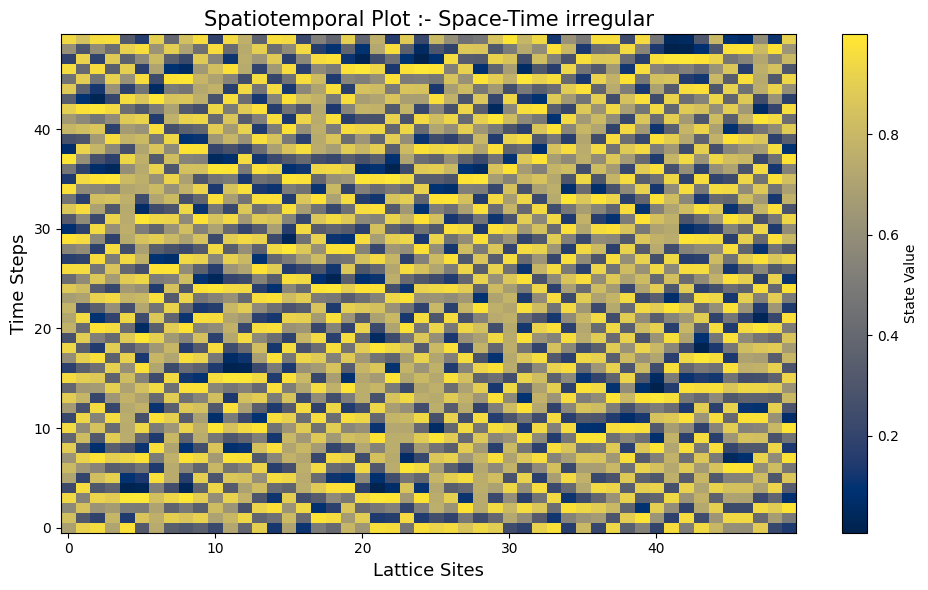

In [ ]:
# Irregular in space and time

# r in chaotic phase

model = logistic_cml(r=4, epsilon=0.05, num_sites=50, num_iterations=500, pattern='random', condition = 'Space-Time irregular')

model.plot()

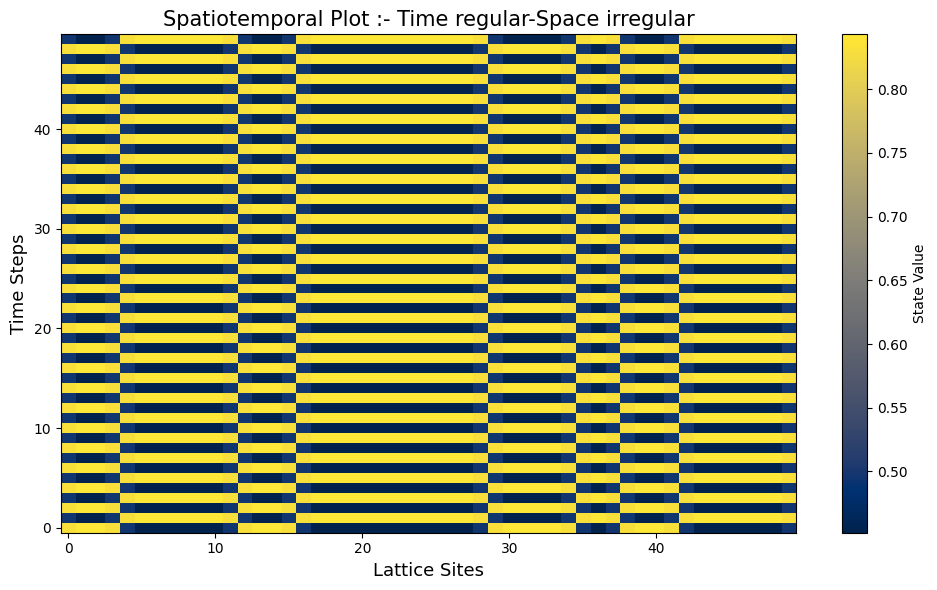

In [ ]:
# Time regular and space irregular

# r in periodic phase

model = logistic_cml(r=3.4, epsilon=0.1, num_sites=50, num_iterations=500, pattern='random', condition = 'Time regular-Space irregular')

model.plot()

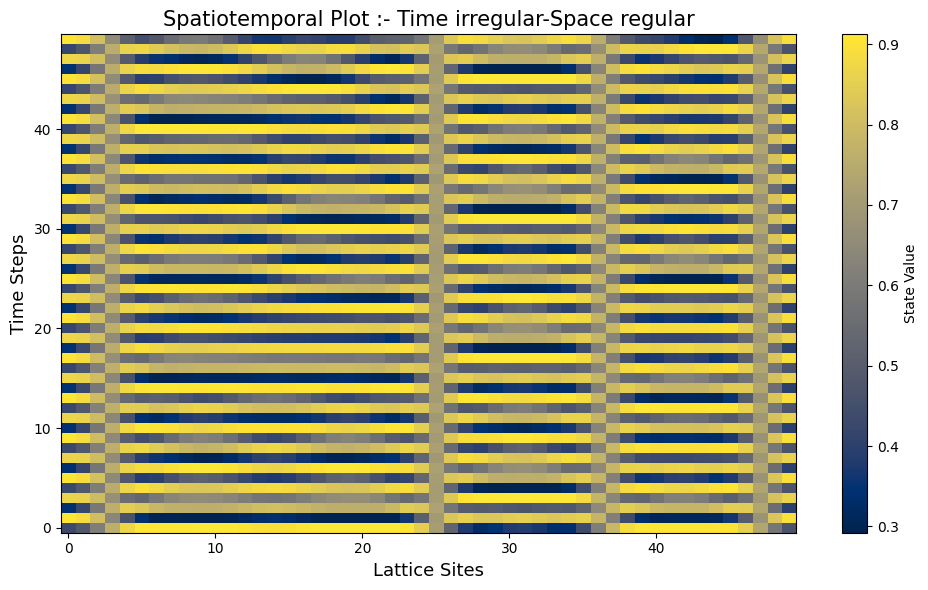

In [ ]:
# Time irregular space regular
# r in chaotic phase

model = logistic_cml(r=3.65, epsilon=0.75, num_sites=50, num_iterations=500, pattern='random', condition = 'Time irregular-Space regular')

model.plot()

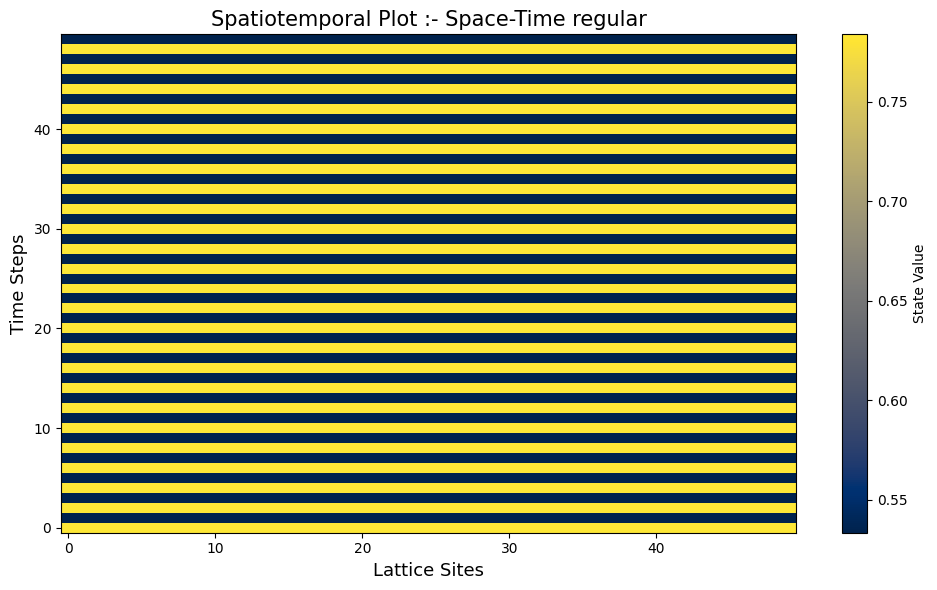

In [ ]:
# Time and space regular
# r in periodic phase

model = logistic_cml(r=3.15, epsilon=0.8, num_sites=50, num_iterations=500, pattern='random', condition = 'Space-Time regular')

model.plot()

# Dynamic Randomness of r and epsilon

In [ ]:
# Dynamic Changes in r and e value

class logistic_cml_dynamic_variation:
    def __init__(self, r_min, r_max, r_bridge, e_bridge, prob_r, prob_e, epsilon_min,epsilon_max, num_sites, num_iterations, pattern, condition):
        self.r_min = r_min
        self.r_max = r_max
        self.num_sites = num_sites
        self.num_iterations = num_iterations
        self.pattern = pattern
        self.condition = condition
        self.r_bridge = r_bridge
        self.e_bridge = e_bridge
        self.prob_r = prob_r
        self.prob_e = prob_e
        self.epsilon_min = epsilon_min
        self.epsilon_max = epsilon_max

    def initial_conds(self):
        if self.pattern == 'random':
            initial_arr = np.random.rand(self.num_sites)
        elif self.pattern == 'uniform':
            initial_arr = np.random.uniform(0, 1, self.num_sites)
        return initial_arr

    # The function for Probabilistic randomness introduced in parameter values
    def change_num_prob(self,min_num,max_num,bridge_num,prob):
        if random.random() < prob:
         return np.random.uniform(low = min_num, high = bridge_num)
        else:
         return np.random.uniform(low = bridge_num, high = max_num)

    def logistic_map(self, x, r_value):
        return r_value * x * (1 - x)

    def simulation(self):
        total_lattice = []
        initial_row = self.initial_conds()
        total_lattice.append(initial_row)

        for t in range(self.num_iterations - 1):
            new_layer = []  # Placeholder for the new state of the lattice
            epsilon = self.change_num_prob(self.epsilon_min,self.epsilon_max,self.e_bridge,self.prob_e)
            r_value = self.change_num_prob(self.r_min,self.r_max,self.r_bridge,self.prob_r) # Parameters initialized in iteration loop,
                                                                                              #for a constant value in a particular iteration
            for i in range(self.num_sites):

                # Periodic condition for neighbors
                if i == 0:
                    left_neighbor = total_lattice[t][self.num_sites - 1]
                    right_neighbor = total_lattice[t][i + 1]
                elif i == self.num_sites - 1:
                    left_neighbor = total_lattice[t][i - 1]
                    right_neighbor = total_lattice[t][0]
                else:
                    left_neighbor = total_lattice[t][i - 1]
                    right_neighbor = total_lattice[t][i + 1]

                # Current cell
                current_cell = total_lattice[t][i]

                # Computing new cell state
                new_cell = ((1 - epsilon) * self.logistic_map(current_cell,r_value=r_value) +
                            (epsilon / 2) * (self.logistic_map(left_neighbor,r_value=r_value) + self.logistic_map(right_neighbor,r_value=r_value)))

                new_layer.append(new_cell)  # Append the new cell state to the new layer

            # Append the new layer (lattice state) to the total lattice
            total_lattice.append(new_layer)
        return np.array(total_lattice[self.num_iterations - self.num_sites:])

    def plot(self):
        lattice = self.simulation()
        plt.figure(figsize=(10, 6))
        plt.imshow(lattice, aspect='auto', cmap='viridis', origin='lower')
        plt.colorbar(label='State Value')
        plt.xlabel('Lattice Sites', size=13)
        plt.ylabel('Time Steps', size=13)
        plt.title(f'Spatiotemporal Plot :-{self.condition}', size=15)
        plt.tight_layout()
        plt.show()


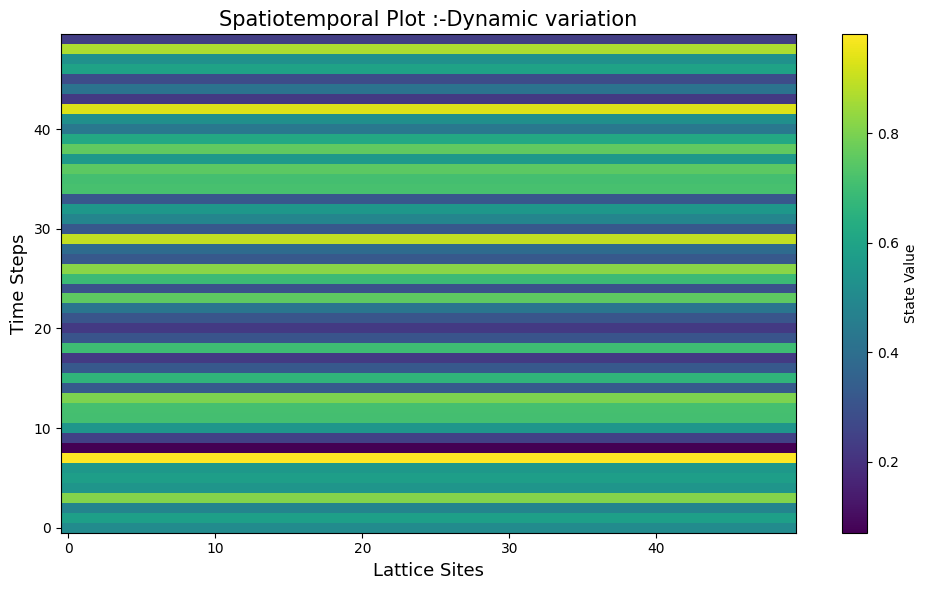

In [ ]:
# Parameters
r_min = 1.0
r_max = 4.0
r_bridge = 3.6
e_bridge = 0.5

prob_r = 0.8
prob_e = 0.8

epsilon_min = 0.0
epsilon_max = 1.0

num_sites = 50
num_iterations = 500
pattern = 'random'
condition = 'Dynamic variation'

# Dynamic randomness CML simulation
cml = logistic_cml_dynamic_variation(r_min, r_max, r_bridge, e_bridge, prob_r, prob_e, epsilon_min,epsilon_max, num_sites, num_iterations, pattern, condition)
cml.plot()


# Lattice Site Randomness of r and epsilon

In [ ]:
# Dynamic Changes in r and e value

class logistic_cml_site_variation:
    def __init__(self, r_min, r_max, r_bridge, e_bridge, prob_r, prob_e, epsilon_min,epsilon_max, num_sites, num_iterations, pattern, condition):
        self.r_min = r_min
        self.r_max = r_max
        self.num_sites = num_sites
        self.num_iterations = num_iterations
        self.pattern = pattern
        self.condition = condition
        self.r_bridge = r_bridge
        self.e_bridge = e_bridge
        self.prob_r = prob_r
        self.prob_e = prob_e
        self.epsilon_min = epsilon_min
        self.epsilon_max = epsilon_max

    def initial_conds(self):
        if self.pattern == 'random':
            initial_arr = np.random.rand(self.num_sites)
        elif self.pattern == 'uniform':
            initial_arr = np.random.uniform(0, 1, self.num_sites)
        return initial_arr

    def change_num_prob(self,min_num,max_num,bridge_num,prob):
        if random.random() < prob:
         return np.random.uniform(low = min_num, high = bridge_num)
        else:
         return np.random.uniform(low = bridge_num, high = max_num)

    def logistic_map(self, x):
        r_value = self.change_num_prob(self.r_min,self.r_max,self.r_bridge,self.prob_r) # Lattice site randomness in r
        return r_value * x * (1 - x)

    def simulation(self):
        total_lattice = []
        initial_row = self.initial_conds()
        total_lattice.append(initial_row)

        for t in range(self.num_iterations - 1):
            new_layer = []  # Placeholder for the new state of the lattice

            for i in range(self.num_sites):
                epsilon = self.change_num_prob(self.epsilon_min,self.epsilon_max,self.e_bridge,self.prob_e) # Lattice site randomness in epsilon

                # Periodic condition for neighbors
                if i == 0:
                    left_neighbor = total_lattice[t][self.num_sites - 1]
                    right_neighbor = total_lattice[t][i + 1]
                elif i == self.num_sites - 1:
                    left_neighbor = total_lattice[t][i - 1]
                    right_neighbor = total_lattice[t][0]
                else:
                    left_neighbor = total_lattice[t][i - 1]
                    right_neighbor = total_lattice[t][i + 1]

                # Current cell
                current_cell = total_lattice[t][i]

                # Computing new cell state
                new_cell = ((1 - epsilon) * self.logistic_map(current_cell) +
                            (epsilon / 2) * (self.logistic_map(left_neighbor) + self.logistic_map(right_neighbor)))

                new_layer.append(new_cell)  # Append the new cell state to the new layer

            # Append the new layer (lattice state) to the total lattice
            total_lattice.append(new_layer)
        return np.array(total_lattice[self.num_iterations - self.num_sites:])

    def plot(self):
        lattice = self.simulation()
        plt.figure(figsize=(10, 6))
        plt.imshow(lattice, aspect='auto', cmap='viridis', origin='lower')
        plt.colorbar(label='State Value')
        plt.xlabel('Lattice Sites', size=13)
        plt.ylabel('Time Steps', size=13)
        plt.title(f'Spatiotemporal Plot :- {self.condition}', size=15)
        plt.tight_layout()  # Adjust layout
        plt.show()


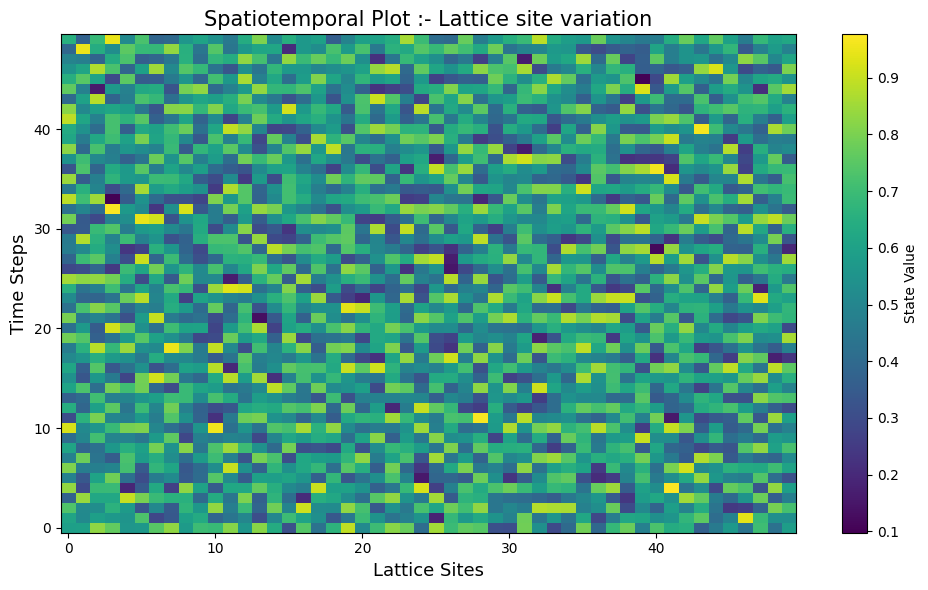

In [ ]:
# Parameters
r_min = 1.0
r_max = 4.0
r_bridge = 3.6
e_bridge = 0.5

prob_r = 0.8
prob_e = 0.8

epsilon_min = 0.0
epsilon_max = 1.0

num_sites = 50
num_iterations = 500
pattern = 'random'
condition = 'Lattice site variation'

# Lattice site randomness CML simulation
cml_site = logistic_cml_site_variation(r_min, r_max, r_bridge, e_bridge, prob_r, prob_e, epsilon_min,epsilon_max, num_sites, num_iterations, pattern, condition)
cml_site.plot()
